In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
import warnings

warnings.filterwarnings("ignore")

# 1: Load and Inspect Data

In [2]:
df = pd.read_csv(r"D:\data analyst\codesoft\IMDb Movies India.csv\IMDb Movies India.csv", encoding='latin1')

In [3]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


# 2: Data Cleaning

In [5]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
df = df.dropna(subset=['Rating'])

In [7]:
categorical_columns = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
for col in categorical_columns:
    df[col] = df[col].fillna('Unknown')

In [8]:
df['Year'] = df['Year'].str.extract(r'(\d{4})').astype(float)

In [9]:
df['Duration'] = df['Duration'].str.replace(' min', '').astype(float)

In [10]:
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

In [11]:
numerical_columns = ['Year', 'Duration', 'Votes']
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())

In [12]:
print("Remaining missing values in each column after handling:\n", df.isnull().sum())

Remaining missing values in each column after handling:
 Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


In [13]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,35.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,1992.0,134.0,"Action, Crime, Drama",5.3,135.0,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,1989.0,125.0,"Action, Crime, Drama",5.8,44.0,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,1988.0,134.0,Action,4.6,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999.0,129.0,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


<Axes: xlabel='Year', ylabel='Rating'>

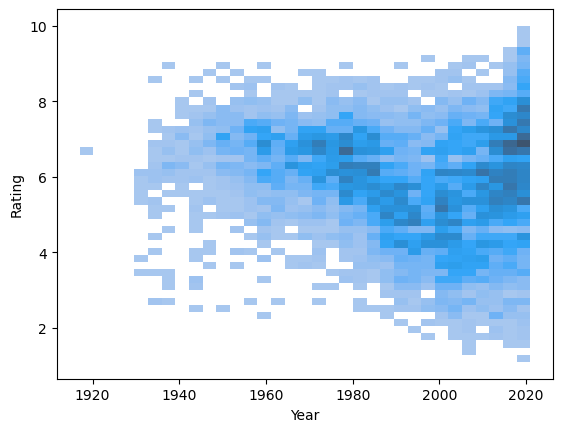

In [39]:
sns.histplot(x="Year",y="Rating",data=df)

In [49]:
yearly_avg_rating = df.groupby('Year')['Rating'].max()

sorted_yearly_avg_rating = yearly_avg_rating.sort_values(ascending=False)

top_10_years = sorted_yearly_avg_rating.head(10)
print(top_10_years)

Year
2020.0    10.0
2021.0     9.7
2019.0     9.4
2017.0     9.4
2018.0     9.3
2007.0     9.2
2015.0     9.2
2011.0     9.1
1997.0     9.1
1938.0     9.0
Name: Rating, dtype: float64


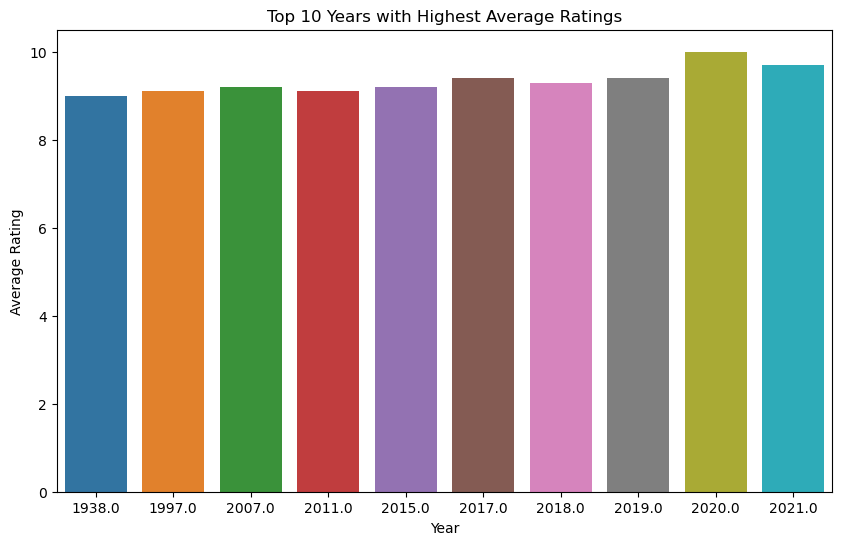

In [50]:
top_10_years_df = top_10_years.reset_index()

top_10_years_df.columns = ['Year', 'Average Rating']

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Average Rating', data=top_10_years_df)
plt.title('Top 10 Years with Highest Average Ratings')
plt.show()

# 3:Feature Engineering

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [52]:
features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Year', 'Duration', 'Votes']
target = 'Rating'

X = df[features]
y = df[target]

categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  
)

X_encoded = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print("Feature engineering and data splitting completed.")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Feature engineering and data splitting completed.
Training set size: 6335 samples
Test set size: 1584 samples


# 4: Model Training and Evaluation

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
linear_reg = LinearRegression()
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

linear_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

y_pred_lr = linear_reg.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Linear Regression - Mean Squared Error:", mse_lr)
print("Linear Regression - R^2 Score:", r2_lr)

print("Random Forest Regressor - Mean Squared Error:", mse_rf)
print("Random Forest Regressor - R^2 Score:", r2_rf)

Linear Regression - Mean Squared Error: 3.987315327277715
Linear Regression - R^2 Score: -1.1447036275498452
Random Forest Regressor - Mean Squared Error: 1.2599648611111112
Random Forest Regressor - R^2 Score: 0.3222880594058102


## Linear Regression:
MSE: 3.987 (higher value indicates poorer fit)

R² Score: -1.144 (negative value indicates a very poor fit)
    
## Random Forest Regressor:
MSE: 1.260 (lower value indicates better fit)

R² Score: 0.322 (positive value but relatively low, indicating some predictive power)

# 5:Hyperparameter Tuning 

In [55]:
import optuna

def objective(trial):

    n_estimators = trial.suggest_int('n_estimators', 100, 300)
    max_depth = trial.suggest_int('max_depth', 10, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        bootstrap=bootstrap,
        random_state=42
    )
    

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, n_jobs=-1)

best_params = study.best_params
print("Best Parameters:", best_params)

best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

y_pred_best = best_model.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("Best Random Forest Regressor - Mean Squared Error:", mse_best)
print("Best Random Forest Regressor - R^2 Score:", r2_best)


[I 2024-06-06 11:51:35,253] A new study created in memory with name: no-name-877a57fc-2362-4773-8f57-bca4cd812f5f
[I 2024-06-06 11:52:45,292] Trial 3 finished with value: 1.2783384681553047 and parameters: {'n_estimators': 104, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 4, 'bootstrap': True}. Best is trial 3 with value: 1.2783384681553047.
[I 2024-06-06 11:52:50,143] Trial 1 finished with value: 1.271243863733604 and parameters: {'n_estimators': 111, 'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 1 with value: 1.271243863733604.
[I 2024-06-06 11:53:42,106] Trial 4 finished with value: 1.2685541496766337 and parameters: {'n_estimators': 143, 'max_depth': 18, 'min_samples_split': 9, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 4 with value: 1.2685541496766337.
[I 2024-06-06 11:53:48,880] Trial 9 finished with value: 1.3007516640370813 and parameters: {'n_estimators': 132, 'max_depth': 30, 'min_samples_split'

Best Parameters: {'n_estimators': 154, 'max_depth': 18, 'min_samples_split': 8, 'min_samples_leaf': 1, 'bootstrap': True}
Best Random Forest Regressor - Mean Squared Error: 1.2462490573026628
Best Random Forest Regressor - R^2 Score: 0.32966553817742894


In [56]:
df.shape

(7919, 10)

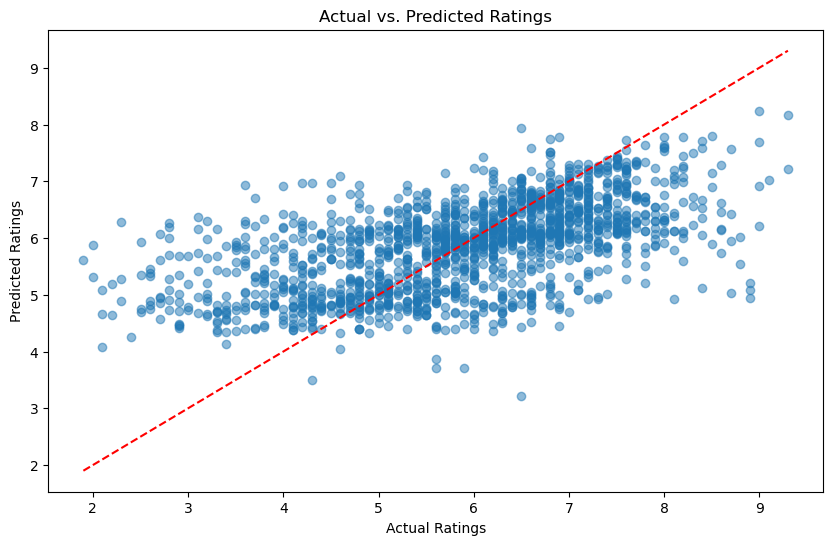

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings')
plt.show()


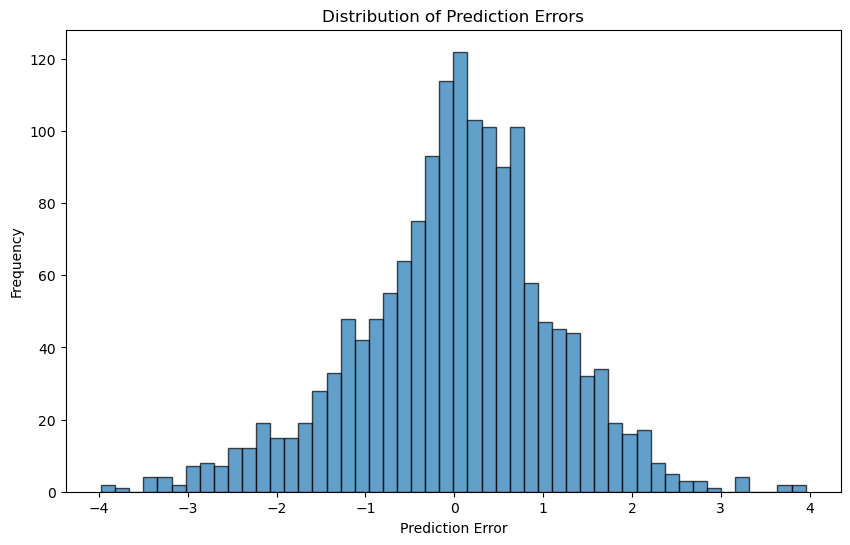

In [58]:
errors = y_test - y_pred_best

plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()


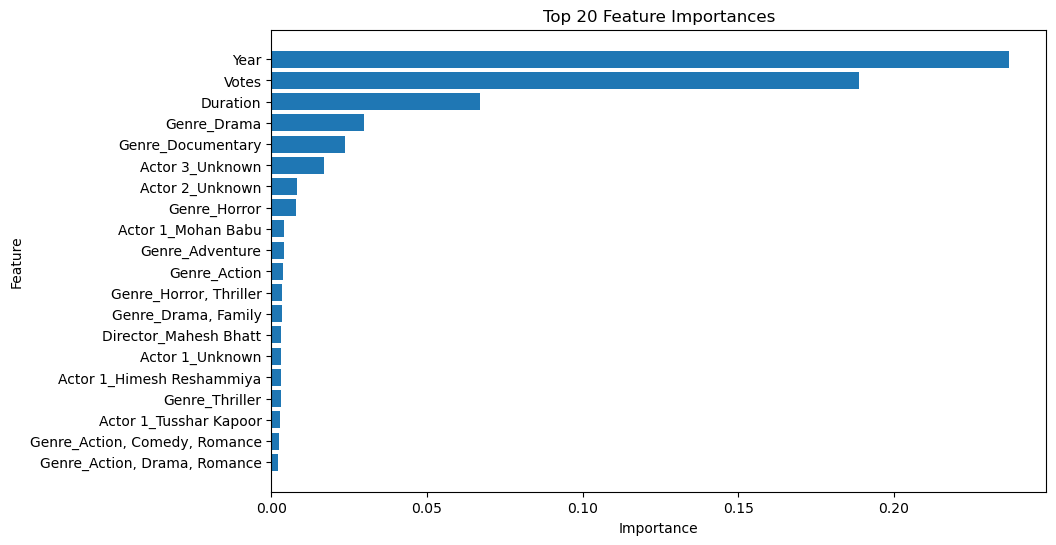

In [60]:
top_n = 20

feature_importances = best_model.feature_importances_

encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = np.append(encoded_feature_names, ['Year', 'Duration', 'Votes'])

feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

top_features = feature_importance_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [62]:
initial_r2_percentage = r2_rf * 100
best_r2_percentage = r2_best * 100

print(f"Initial Random Forest Regressor - Accuracy: {initial_r2_percentage:.2f}%")
print(f"Best Random Forest Regressor - Accuracy: {best_r2_percentage:.2f}%")


Initial Random Forest Regressor - Accuracy: 32.23%
Best Random Forest Regressor - Accuracy: 32.97%


# with XGBoost Regressor

In [63]:
import xgboost as xgb

xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

xgboost_model.fit(X_train, y_train)

y_pred_xgb = xgboost_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
accuracy_xgb = r2_xgb * 100

print("XGBoost Regressor - Mean Squared Error:", mse_xgb)
print("XGBoost Regressor - R² Score:", r2_xgb)
print(f"XGBoost Regressor - Accuracy: {accuracy_xgb:.2f}%")

XGBoost Regressor - Mean Squared Error: 1.209850247497832
XGBoost Regressor - R² Score: 0.34924378896007136
XGBoost Regressor - Accuracy: 34.92%


# with Gradient Boosting Machine

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(random_state=42)

gbm.fit(X_train, y_train)

y_pred_gbm = gbm.predict(X_test)

mse_gbm = mean_squared_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)

print("Gradient Boosting Machine - Mean Squared Error:", mse_gbm)
print("Gradient Boosting Machine - R^2 Score:", r2_gbm)


Gradient Boosting Machine - Mean Squared Error: 1.306163423595697
Gradient Boosting Machine - R^2 Score: 0.29743870177651877


In [70]:
r2_percentage = r2_score(y_test, y_pred_gbm) * 100
print("Gradient Boosting Machine - R^2 Score (Percentage): {:.2f}%".format(r2_percentage))


Gradient Boosting Machine - R^2 Score (Percentage): 29.74%


# with AdaBoostRegressor

In [82]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(random_state=42)

adaboost.fit(X_train, y_train)

y_pred_adaboost = adaboost.predict(X_test)

mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
r2_adaboost = r2_score(y_test, y_pred_adaboost)

r2_percentage_adaboost = r2_adaboost * 100

print("AdaBoostRegressor - Mean Squared Error:", mse_adaboost)
print("AdaBoostRegressor - R^2 Score (Percentage): {:.2f}%".format(r2_percentage_adaboost))

AdaBoostRegressor - Mean Squared Error: 1.5767609120748298
AdaBoostRegressor - R^2 Score (Percentage): 15.19%
